# Investigating the Basin of Likelihood
## Are there multiple trees of similar likelihood in small trees / low noise ?

Author: Gordon J. Köhn

Working Period: 11.08.2023

### Setting up the Envrionment

In [2]:
import pyggdrasil as yg
import numpy as np
import json 

from pathlib import Path

# set the backend for matplotlib
import matplotlib
matplotlib.use('macosx')

import matplotlib.pyplot as plt
%matplotlib inline  

### Load the Data
 We are interested in trees of:

 - 5 mutations
 - ideal noise
 - 200 cells

In [3]:
# Define Data Files
distances_MP3 =  "../../PYggdrasil/data/mark03/analysis/MCMC_53-CS_42-T_r_6_42-200_1e-06_1e-06_0.0_f_UXR-iT_h_6_CS_42-T_r_6_42-200_1e-06_1e-06_0.0_f_UXR-MC_1e-06_1e-06_2000_0_1-MPC_0.1_0.65_0.25/T_r_6_42/MP3.json"
distances_AD =  "../../PYggdrasil/data/mark03/analysis/MCMC_53-CS_42-T_r_6_42-200_1e-06_1e-06_0.0_f_UXR-iT_h_6_CS_42-T_r_6_42-200_1e-06_1e-06_0.0_f_UXR-MC_1e-06_1e-06_2000_0_1-MPC_0.1_0.65_0.25/T_r_6_42/AD.json"
distances_DL =  "../../PYggdrasil/data/mark03/analysis/MCMC_53-CS_42-T_r_6_42-200_1e-06_1e-06_0.0_f_UXR-iT_h_6_CS_42-T_r_6_42-200_1e-06_1e-06_0.0_f_UXR-MC_1e-06_1e-06_2000_0_1-MPC_0.1_0.65_0.25/T_r_6_42/DL.json"
huntress_tree =  "../../PYggdrasil/data/mark03/trees/T_h_6_CS_42-T_r_6_42-200_1e-06_1e-06_0.0_f_UXR.json"
true_tree =  "../../PYggdrasil/data/mark03/trees/T_r_6_42.json"
mcmc_samples = "../../PYggdrasil/data/mark03/mcmc/MCMC_53-CS_42-T_r_6_42-200_1e-06_1e-06_0.0_f_UXR-iT_h_6_CS_42-T_r_6_42-200_1e-06_1e-06_0.0_f_UXR-MC_1e-06_1e-06_2000_0_1-MPC_0.1_0.65_0.25.json"

# Define plots that sparked this investigation
AD_plot = "../../PYggdrasil/data/mark03/plots/MC_1e-06_1e-06_2000_0_1-MPC_0.1_0.65_0.25/CS_42-T_r_6_42-200_1e-06_1e-06_0.0_f_UXR/T_r_6_42/AD_iter.svg"
MP3_plot = "../../PYggdrasil/data/mark03/plots/MC_1e-06_1e-06_2000_0_1-MPC_0.1_0.65_0.25/CS_42-T_r_6_42-200_1e-06_1e-06_0.0_f_UXR/T_r_6_42/MP3_iter.svg"
log_plot = "../../PYggdrasil/data/mark03/plots/MC_1e-06_1e-06_2000_0_1-MPC_0.1_0.65_0.25/CS_42-T_r_6_42-200_1e-06_1e-06_0.0_f_UXR/T_r_6_42/log_prob_iter.svg"

In [4]:
# load the distances
#  as data["iteration"], data["result"]
with open(Path(distances_MP3)) as f:
    data_MP3 = json.load(f)
with open(Path(distances_AD)) as f:
    data_AD = json.load(f)
with open(Path(distances_DL)) as f:
    data_DL = json.load(f)

# load the trees
huntress_tree_d = yg.serialize.read_tree_node(Path(huntress_tree))
true_tree_d = yg.serialize.read_tree_node(Path(true_tree))

# load the mcmc samples
# load the data
mcmc_samples_d = yg.serialize.read_mcmc_samples(Path(mcmc_samples))
mcmc_data = yg.analyze.to_pure_mcmc_data(mcmc_samples_d)


### Strategy to Analyze 

1) look at the original plots again
2) plot the Huntress AD / MP3 and log prob together - with serpeat axis
3) make a boolan matrix of all mcmc samples to compare trees
4) check for true tree
5) check for unique trees of likelihoods closes to true tree 


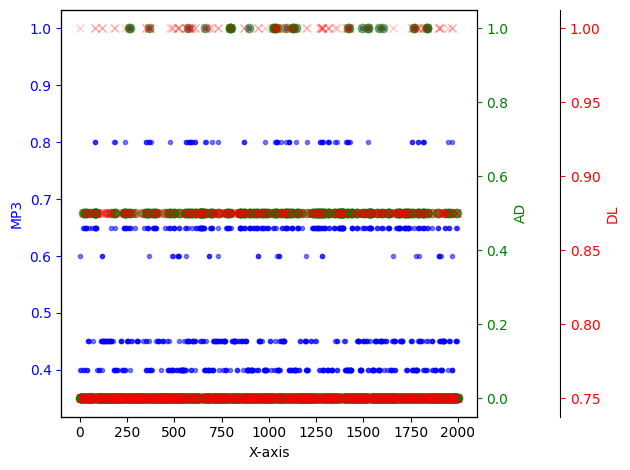

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = data_MP3["iteration"]
y1 = data_MP3["result"]
y2 = data_AD["result"]
y3 = data_DL["result"]

# Create the main axis
fig, ax1 = plt.subplots()

# Plot the first series on the main axis
ax1.plot(x, y1, 'b.', alpha=0.5)
ax1.set_xlabel('X-axis')
ax1.set_ylabel('MP3', color='b')
ax1.tick_params('y', colors='b')

# Create a twin y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second series on the twin y-axis
ax2.plot(x, y2, 'go', alpha=0.5)
ax2.set_ylabel('AD', color='g')
ax2.tick_params('y', colors='g')

# Create a twin x-axis sharing the same y-axis
ax3 = ax1.twinx()

# Plot the third series on the second twin y-axis
ax3.plot(x, y3, 'rx', alpha=0.2)
ax3.spines['right'].set_position(('outward', 60))  # Adjust position of this axis
ax3.set_ylabel('DL', color='r')
ax3.tick_params('y', colors='r')

# Adjust layout
fig.tight_layout()
plt.show()

Looks like 8 differnt trees at least.

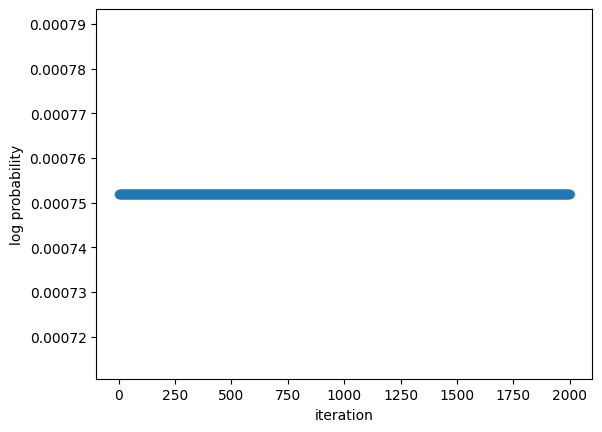

In [6]:
## plot the likelihood 
x = mcmc_data.iterations
y = mcmc_data.log_probabilities
plt.plot(x, -y, 'o', alpha=0.3)
# convert y-axis to Logarithmic scale
#plt.yscale("log")
plt.xlabel('iteration')
plt.ylabel('log probability')
plt.show()

This is expected - the plot in the presentation did already show a completly flat log-prob for ideal noise.

In [7]:
print(np.unique(np.array(mcmc_data.log_probabilities)))
print((np.array(mcmc_data.log_probabilities)).shape)

[-0.00075197]
(2000,)


Oh woah! - not the slightest change.

The next plot has little sense then.

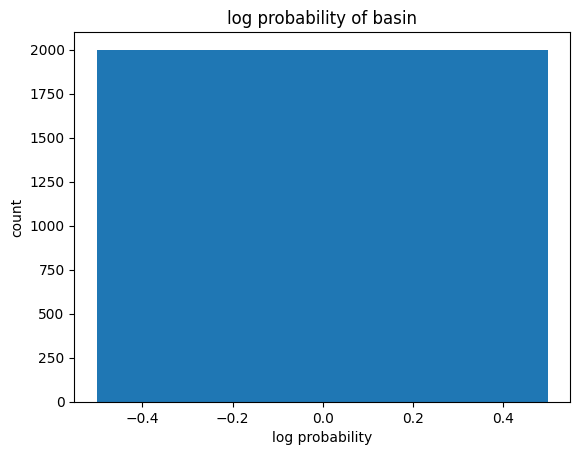

In [8]:
## make a historgram of the log probabilities
plt.hist(mcmc_data.log_probabilities, bins="auto")
plt.xlabel("log probability")
plt.ylabel("count")
plt.title("log probability of basin")
plt.show()

### Is there a platteu ? 

[This has little point now as well]

What is the precision I should choose to call trees identical in log prob? 

Let's just say 4 figure for now.

In [9]:
# initial tree - must be the huntress tree
mcmc_data.trees[0].print_topo()

5
├── 1
│   └── 3
├── 0
│   └── 2
└── 4


In [30]:
## find the identical trees - by topology

# Create two input vectors
# truncate to the first 10 trees
vector_x = np.array(mcmc_data.trees)
vector_y = np.array(mcmc_data.trees)

# Initialize an empty matrix
output_matrix = []

In [31]:
# Apply the function using nested loops
for x in vector_x:
    row = []
    for y in vector_y:
        result = yg.compare_trees(x, y)
        row.append(result)
    output_matrix.append(row)

# Convert the output matrix to a dataframe
identical_trees = np.array(output_matrix)

In [32]:
np.count_nonzero(identical_trees == True)

71802

## Overlay Likelihood Map

[Skipped as all have same likelihood]

In [ ]:
# find the identical trees - by looking at the likelihoods

# define the precision of the delta -  how close the two likelihoods have to be to be considered identical
# 5 decimal places
delta_precision = 0.00001

# Define the function you want to apply
def is_same_log_prob(x, y):
    """
    Returns True if the two input values are the same, False otherwise.
    """

    # TODO: trees that are so far away from the best likelihood

    return np.abs(x - y) < delta_precision

# Create two input vectors
vector_x = np.array(mcmc_data.log_probabilities)
vector_y = np.array(mcmc_data.log_probabilities)

# Initialize an empty matrix
output_matrix_lp = []

# Create a meshgrid of the input vectors
X, Y = np.meshgrid(vector_x, vector_y)

# Apply the function element-wise using broadcasting
output_matrix = is_same_log_prob(X, Y)

In [ ]:
## now overlay the trees that are identical and the ones that share the same lieklihood.

## Now find the number of unique trees

In [45]:
def count_rows_with_ones(matrix):
    n = len(matrix)
    count = 0
    unique_rows = []
    for i in range(n):
            # upper triagle part of row
            row_half = matrix[i][i + 1:]

            if sum(row_half) > 0:
                count += 1
            else:
                unique_rows = unique_rows + [i]
    
    return count, unique_rows

In [44]:
matrix = [
    [0, 1, 0, 0],
    [1, 0, 0, 0],
    [0, 0, 0, 1],
    [1, 0, 0, 0]
]

tree_duplicated = count_rows_with_ones(matrix)
print(tree_duplicated)

(2, [1, 3])


In [50]:
tree_duplicated = count_rows_with_ones(identical_trees)

In [51]:
# get the number of unique trees
2000 - tree_duplicated[0]

60

So we have 60 unique trees! Let's see what they look like.

In [62]:
tree_duplicated[1]

[1526,
 1544,
 1571,
 1628,
 1722,
 1768,
 1783,
 1786,
 1788,
 1798,
 1799,
 1806,
 1814,
 1818,
 1832,
 1837,
 1850,
 1864,
 1881,
 1882,
 1896,
 1898,
 1911,
 1913,
 1914,
 1915,
 1916,
 1919,
 1920,
 1929,
 1931,
 1932,
 1947,
 1948,
 1952,
 1953,
 1955,
 1956,
 1959,
 1963,
 1964,
 1966,
 1967,
 1968,
 1970,
 1971,
 1974,
 1975,
 1977,
 1978,
 1982,
 1987,
 1988,
 1991,
 1992,
 1993,
 1994,
 1995,
 1997,
 1999]

In [63]:
for unique_idx in tree_duplicated[1]:
    tree = mcmc_data.trees[unique_idx]
    print(f"Iteration: {unique_idx}")
    tree.print_topo()

Iteration: 1526
5
├── 3
│   └── 1
├── 0
│   └── 2
└── 4
Iteration: 1544
5
├── 3
│   └── 0
├── 4
│   └── 2
└── 1
Iteration: 1571
5
├── 4
│   └── 0
├── 2
│   └── 3
└── 1
Iteration: 1628
5
├── 1
│   └── 3
├── 0
│   └── 4
└── 2
Iteration: 1722
5
├── 1
│   └── 0
├── 2
│   └── 4
└── 3
Iteration: 1768
5
├── 3
│   └── 4
├── 2
│   └── 0
└── 1
Iteration: 1783
5
├── 2
│   └── 0
├── 3
│   └── 1
└── 4
Iteration: 1786
5
├── 4
│   └── 0
├── 3
│   └── 2
└── 1
Iteration: 1788
5
├── 2
│   └── 3
├── 0
│   └── 4
└── 1
Iteration: 1798
5
├── 4
│   └── 3
├── 2
│   └── 0
└── 1
Iteration: 1799
5
├── 4
│   └── 3
├── 2
│   └── 1
└── 0
Iteration: 1806
5
├── 1
│   └── 0
├── 3
│   └── 4
└── 2
Iteration: 1814
5
├── 1
│   └── 0
├── 4
│   └── 3
└── 2
Iteration: 1818
5
├── 3
│   └── 2
├── 0
│   └── 1
└── 4
Iteration: 1832
5
├── 1
│   └── 3
├── 4
│   └── 2
└── 0
Iteration: 1837
5
├── 3
│   └── 2
├── 1
│   └── 0
└── 4
Iteration: 1850
5
├── 1
│   └── 3
├── 4
│   └── 0
└── 2
Iteration: 1864
5
├── 4
│   └── 0
├── 2
│   └── 